# Compare Embedding Experiment Runs for Next Word Prediction
These experiments fit an LSTM model as described in the research report using different embedding representations of words then fine tuning the embedding layer along with all other model layers over a fixed number of training rounds.  This notebook is divided into three sections:

- Small network train and validation loss and accuracy
- Large network train and validation loss and accuracy
- Test set loss and accuracy

Note that from each experiment, we take the model that achieved the best validation set performance to compute test set performance.

### Imports

In [1]:
import os, sys, io
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from src import dataset, validation

# Part 1: Small Network Loss and Accuracy

### Load Accuracy and Loss Arrays from Small Model (Batch Size 16)

In [4]:
network = '100_256_100'

In [5]:
random_train_loss = np.load('embedding_layer_results/random_{}/train_loss.npy'.format(network))
random_train_accuracy = np.load('embedding_layer_results/random_{}/train_accuracy.npy'.format(network))
random_val_loss = np.load('embedding_layer_results/random_{}/val_loss.npy'.format(network))
random_val_accuracy = np.load('embedding_layer_results/random_{}/val_accuracy.npy'.format(network))

In [6]:
glove_train_loss = np.load('embedding_layer_results/glove_{}/train_loss.npy'.format(network))
glove_train_accuracy = np.load('embedding_layer_results/glove_{}/train_accuracy.npy'.format(network))
glove_val_loss = np.load('embedding_layer_results/glove_{}/val_loss.npy'.format(network))
glove_val_accuracy = np.load('embedding_layer_results/glove_{}/val_accuracy.npy'.format(network))

In [7]:
# pca_fasttext_train_loss = np.load('embedding_layer_results/pca_fasttext_{}/train_loss.npy'.format(network))
# pca_fasttext_train_accuracy = np.load('embedding_layer_results/pca_fasttext_{}/train_accuracy.npy'.format(network))
# pca_fasttext_val_loss = np.load('embedding_layer_results/pca_fasttext_{}/val_loss.npy'.format(network))
# pca_fasttext_val_accuracy = np.load('embedding_layer_results/pca_fasttext_{}/val_accuracy.npy'.format(network))

In [8]:
# pp_pca_pp_fasttext_train_loss = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/train_loss.npy'.format(network))
# pp_pca_pp_fasttext_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/train_accuracy.npy'.format(network))
# pp_pca_pp_fasttext_val_loss = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/val_loss.npy'.format(network))
# pp_pca_pp_fasttext_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/val_accuracy.npy'.format(network))

In [9]:
pca_gpt2_train_loss = np.load('embedding_layer_results/pca_gpt2_{}/train_loss.npy'.format(network))
pca_gpt2_train_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/train_accuracy.npy'.format(network))
pca_gpt2_val_loss = np.load('embedding_layer_results/pca_gpt2_{}/val_loss.npy'.format(network))
pca_gpt2_val_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/val_accuracy.npy'.format(network))

In [10]:
pp_pca_pp_gpt2_train_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_loss.npy'.format(network))
pp_pca_pp_gpt2_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_accuracy.npy'.format(network))
pp_pca_pp_gpt2_val_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_loss.npy'.format(network))
pp_pca_pp_gpt2_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_accuracy.npy'.format(network))

### Plot Train and Validation Loss from Small Model

In [11]:
x_axis = range(0, len(random_train_loss))

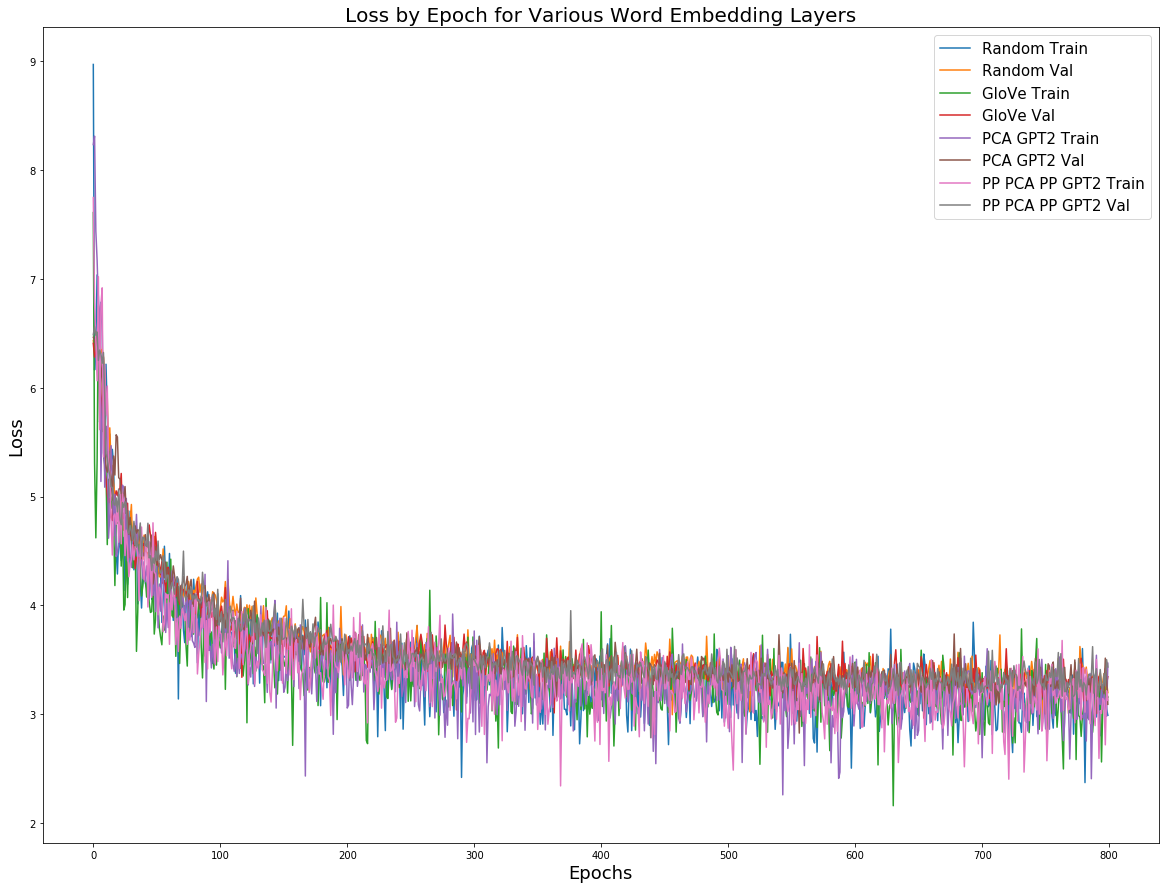

In [12]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_loss, label='Random Train')
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_train_loss, label='GloVe Train')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, pca_fasttext_train_loss, label='PCA FastText Train')
# ax.plot(x_axis, pca_fasttext_val_loss, label='PCA FastText Val')
# ax.plot(x_axis, pp_pca_pp_fasttext_train_loss, label='PP PCA PP FastText Train')
# ax.plot(x_axis, pp_pca_pp_fasttext_val_loss, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_train_loss, label='PCA GPT2 Train')
ax.plot(x_axis, pca_gpt2_val_loss, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_loss, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Validation Loss from Small Model

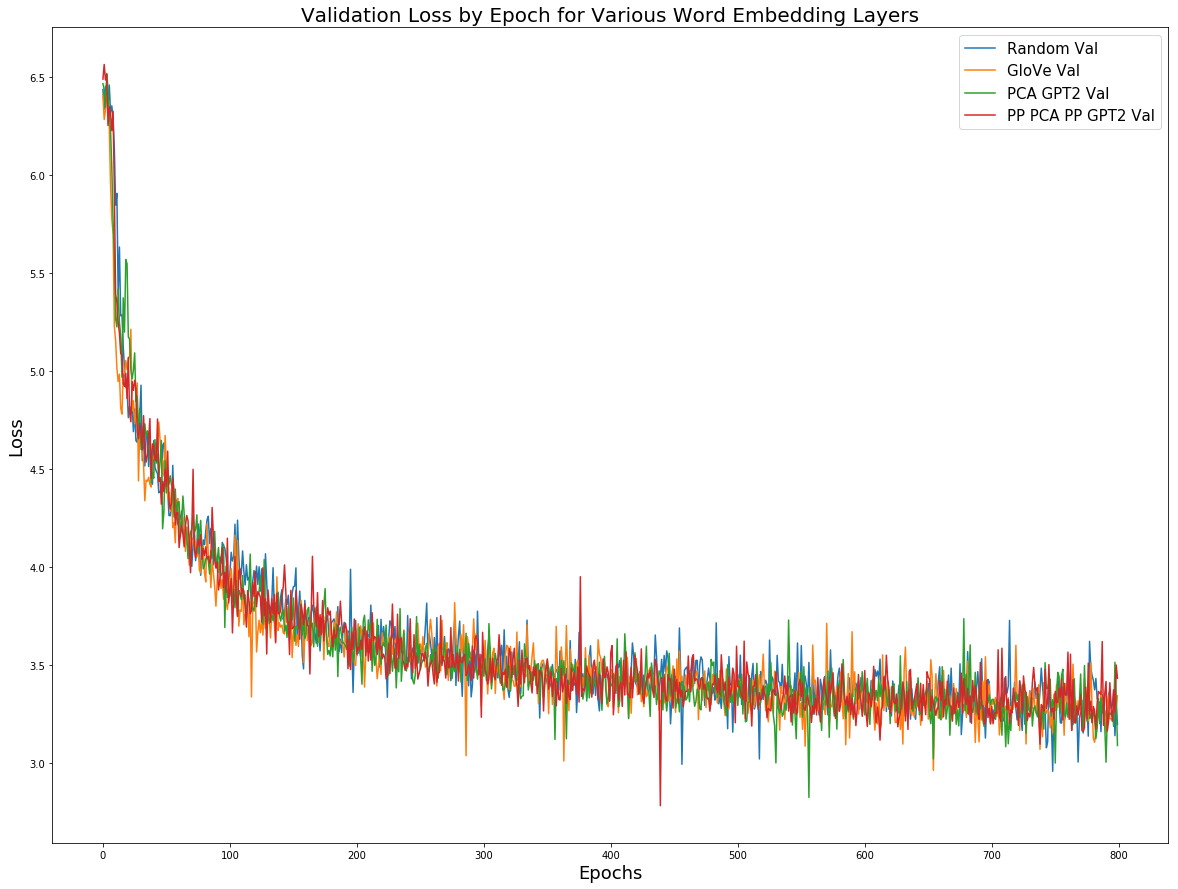

In [13]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, pca_fasttext_val_loss, label='PCA FastText Val')
# ax.plot(x_axis, pp_pca_pp_fasttext_val_loss, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_val_loss, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Train and Validation Accuracy from Small Model

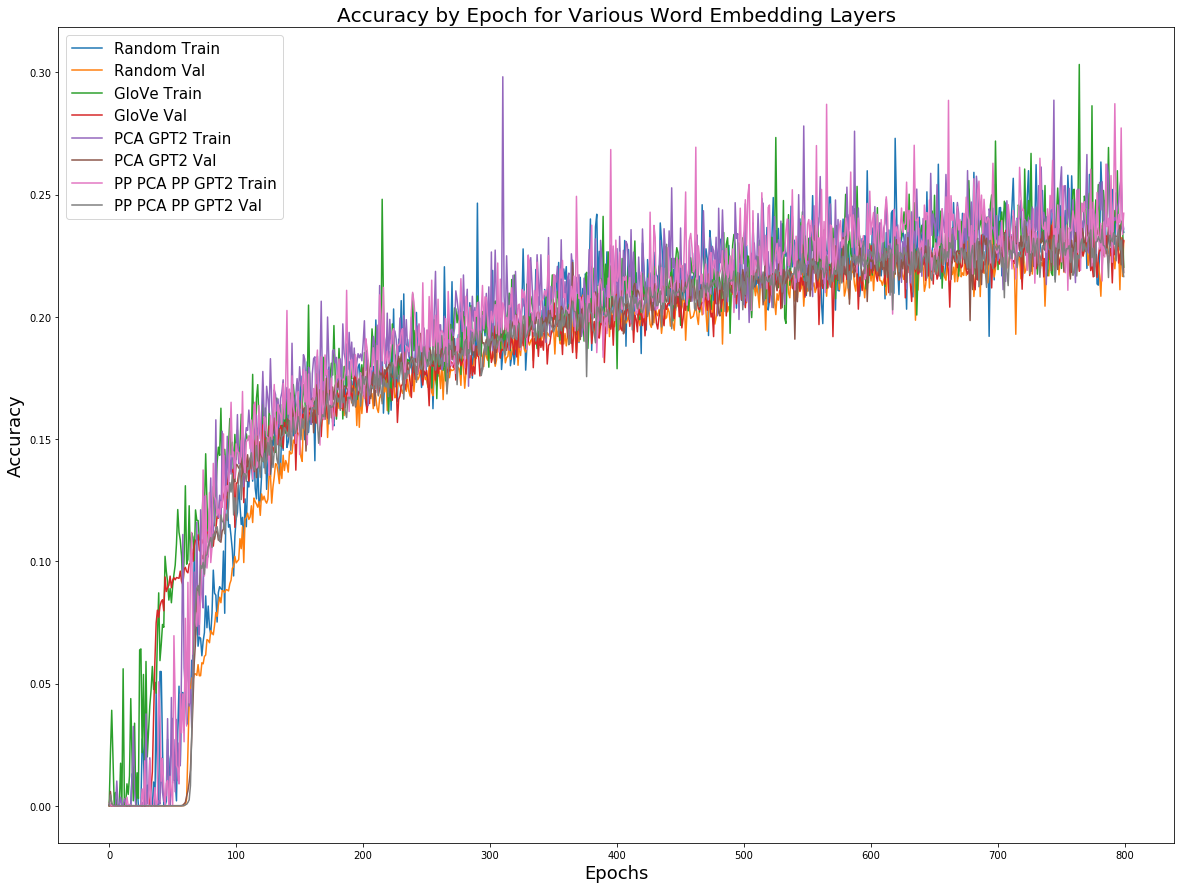

In [14]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_accuracy, label='Random Train')
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_train_accuracy, label='GloVe Train')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, pca_fasttext_train_accuracy, label='PCA FastText Train')
# ax.plot(x_axis, pca_fasttext_val_accuracy, label='PCA FastText Val')
# ax.plot(x_axis, pp_pca_pp_fasttext_train_accuracy, label='PP PCA PP FastText Train')
# ax.plot(x_axis, pp_pca_pp_fasttext_val_accuracy, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_train_accuracy, label='PCA GPT2 Train')
ax.plot(x_axis, pca_gpt2_val_accuracy, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_accuracy, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

### Plot Validation Accuracy from Small Model

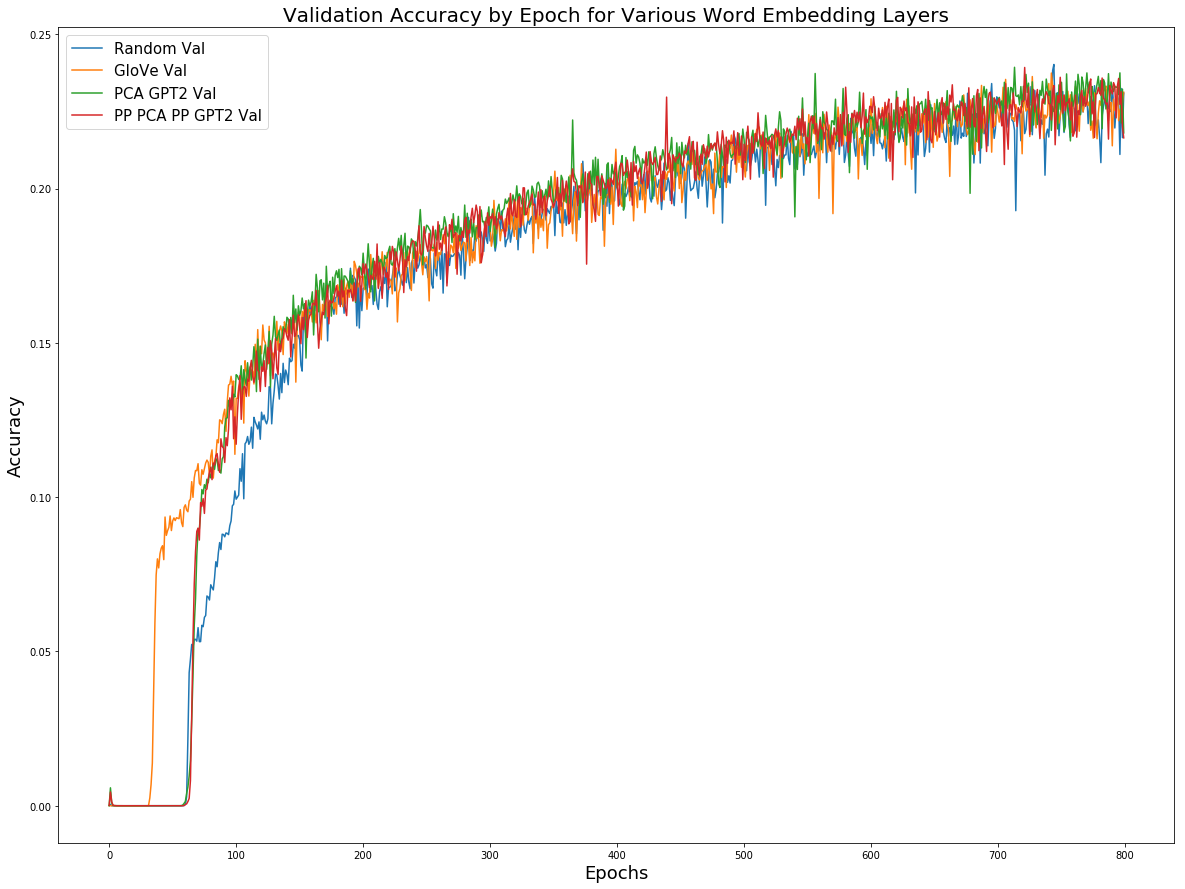

In [15]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, pca_fasttext_val_accuracy, label='PCA FastText Val')
# ax.plot(x_axis, pp_pca_pp_fasttext_val_accuracy, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_val_accuracy, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

# Part 2: Large Network Loss and Accuracy

### Load Accuracy and Loss Arrays from Large Model (Batch Size 16)

In [16]:
network = '300_512_300'

In [17]:
random_train_loss = np.load('embedding_layer_results/random_{}/train_loss.npy'.format(network))
random_train_accuracy = np.load('embedding_layer_results/random_{}/train_accuracy.npy'.format(network))
random_val_loss = np.load('embedding_layer_results/random_{}/val_loss.npy'.format(network))
random_val_accuracy = np.load('embedding_layer_results/random_{}/val_accuracy.npy'.format(network))

In [18]:
glove_train_loss = np.load('embedding_layer_results/glove_{}/train_loss.npy'.format(network))
glove_train_accuracy = np.load('embedding_layer_results/glove_{}/train_accuracy.npy'.format(network))
glove_val_loss = np.load('embedding_layer_results/glove_{}/val_loss.npy'.format(network))
glove_val_accuracy = np.load('embedding_layer_results/glove_{}/val_accuracy.npy'.format(network))

In [19]:
# fasttext_train_loss = np.load('embedding_layer_results/fasttext_{}/train_loss.npy'.format(network))
# fasttext_train_accuracy = np.load('embedding_layer_results/fasttext_{}/train_accuracy.npy'.format(network))
# fasttext_val_loss = np.load('embedding_layer_results/fasttext_{}/val_loss.npy'.format(network))
# fasttext_val_accuracy = np.load('embedding_layer_results/fasttext_{}/val_accuracy.npy'.format(network))

In [20]:
pp_pca_pp_gpt2_train_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_loss.npy'.format(network))
pp_pca_pp_gpt2_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_accuracy.npy'.format(network))
pp_pca_pp_gpt2_val_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_loss.npy'.format(network))
pp_pca_pp_gpt2_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_accuracy.npy'.format(network))

### Plot Train and Validation Loss from Large Model

In [21]:
x_axis = range(0, len(random_train_loss))

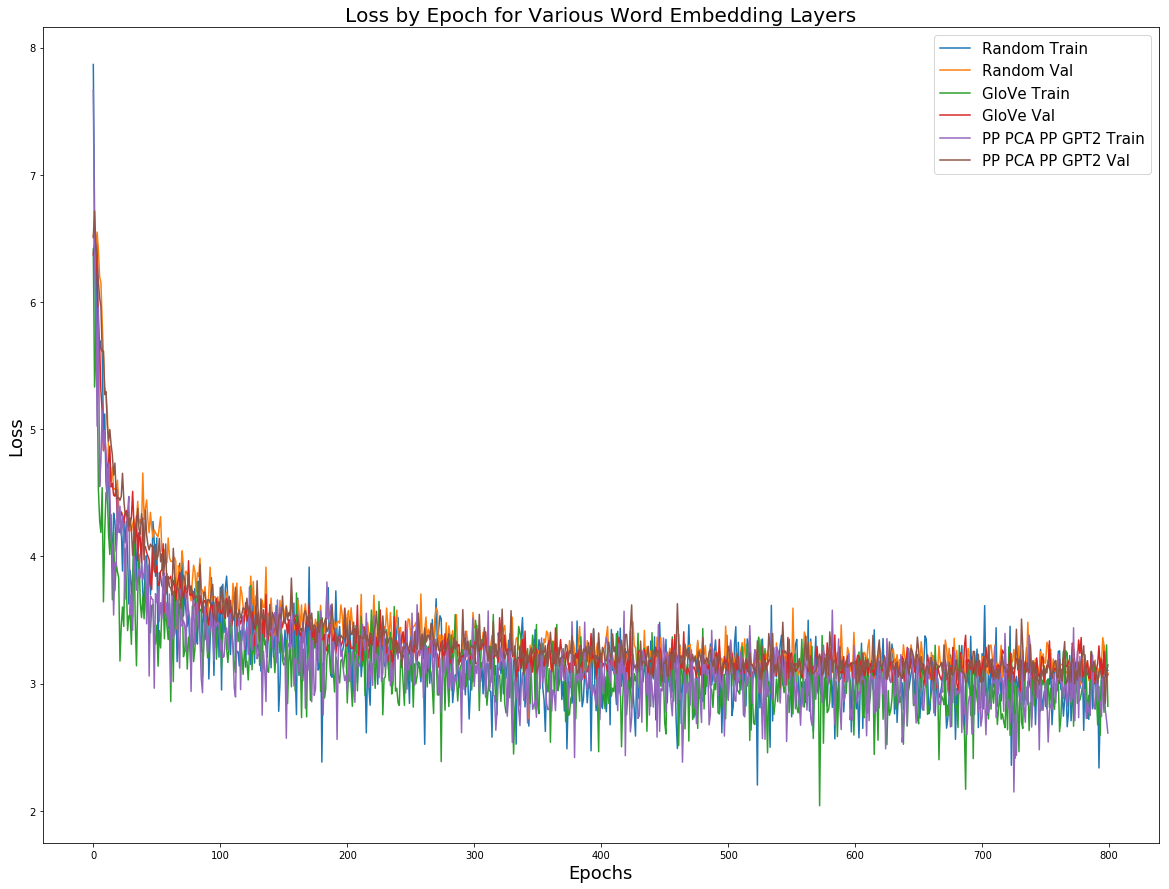

In [22]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_loss, label='Random Train')
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_train_loss, label='GloVe Train')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, fasttext_train_loss, label='FastText Train')
# ax.plot(x_axis, fasttext_val_loss, label='FastText Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_loss, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Validation Loss from Large Model

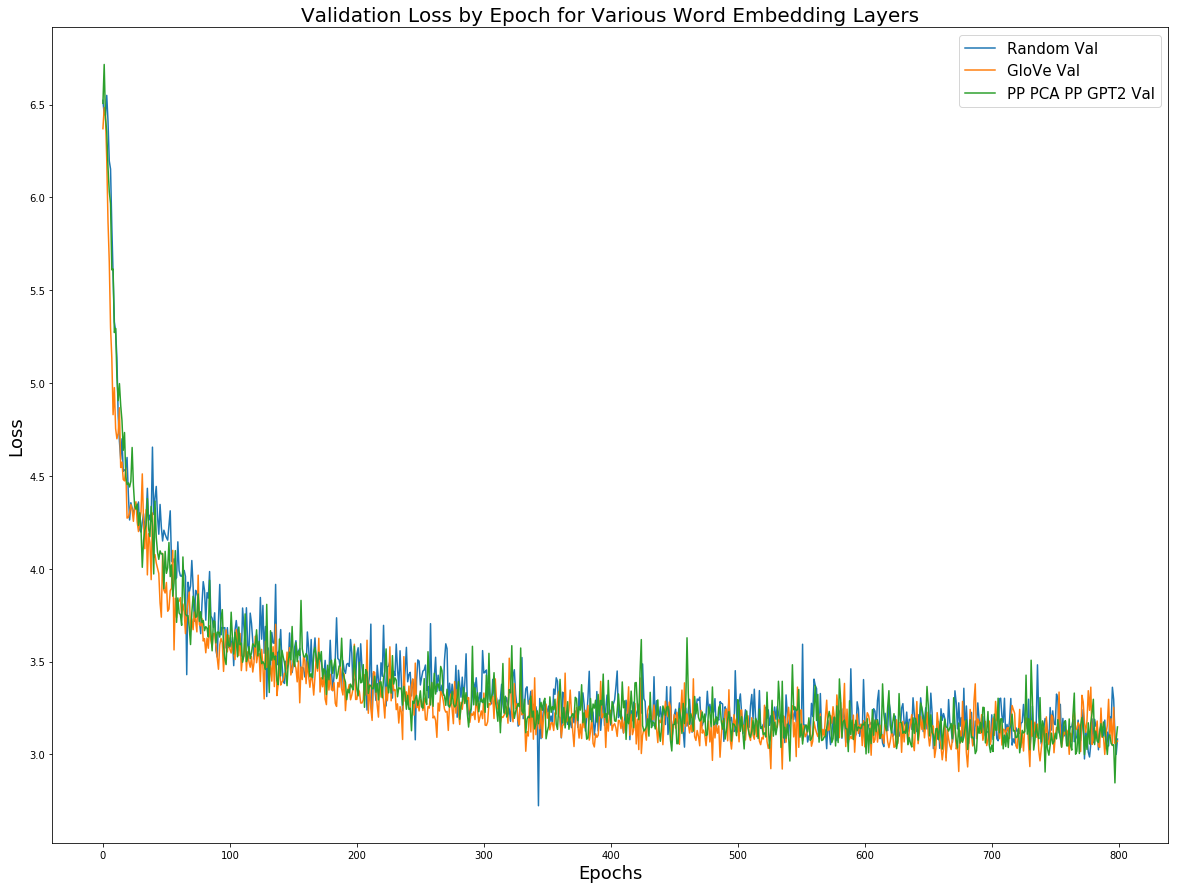

In [23]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, fasttext_val_loss, label='FastText Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Train and Validation Accuracy from Large Model

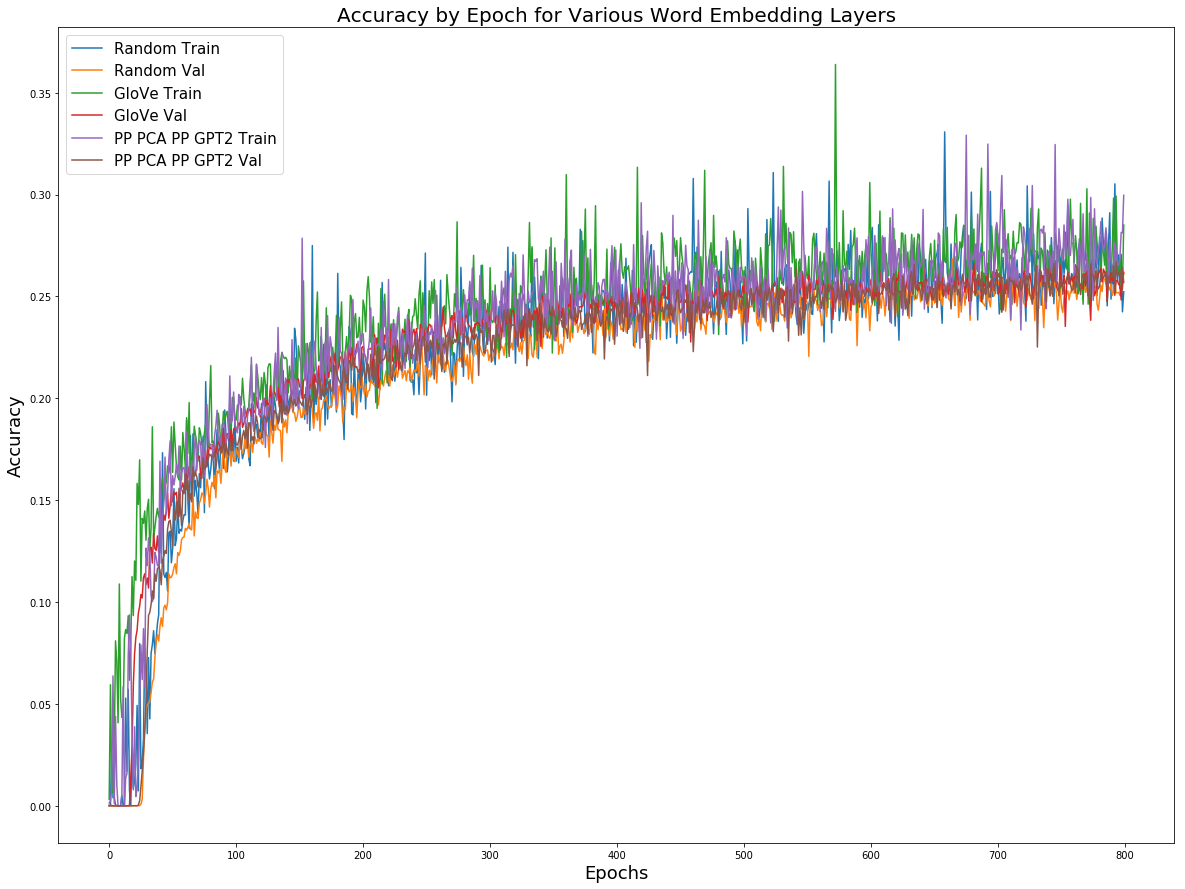

In [24]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_accuracy, label='Random Train')
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_train_accuracy, label='GloVe Train')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, fasttext_train_accuracy, label='FastText Train')
# ax.plot(x_axis, fasttext_val_accuracy, label='FastText Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_accuracy, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

### Plot Validation Accuracy from Large Model

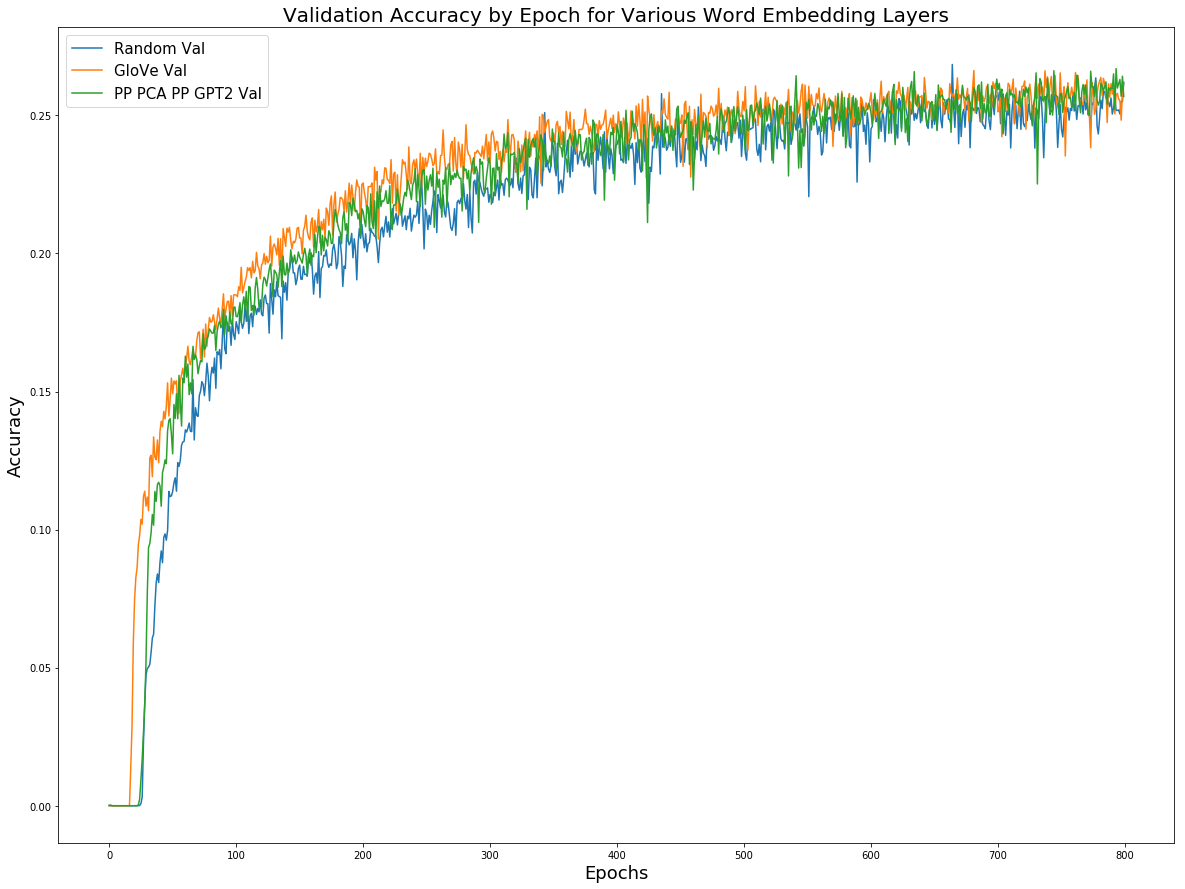

In [25]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, fasttext_val_accuracy, label='FastText Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

# Part 3:  Test Set Performance

### Load Test Dataset and Metrics

In [26]:
VOCAB_SIZE = 10000
BATCH_SIZE = 16
CLIENTS_EPOCHS_PER_ROUND = 1
MAX_SEQ_LENGTH = 20
MAX_ELEMENTS_PER_USER = 5000
CENTRALIZED_TRAIN = False
SHUFFLE_BUFFER_SIZE = 1000
NUM_VALIDATION_EXAMPLES = 2
NUM_TEST_EXAMPLES = 1000000

In [27]:
_, _, test_data = dataset.construct_word_level_datasets(
    vocab_size=VOCAB_SIZE,
    batch_size=BATCH_SIZE,
    client_epochs_per_round=CLIENTS_EPOCHS_PER_ROUND,
    max_seq_len=MAX_SEQ_LENGTH,
    max_elements_per_user=MAX_ELEMENTS_PER_USER,
    centralized_train=CENTRALIZED_TRAIN,
    shuffle_buffer_size=SHUFFLE_BUFFER_SIZE,
    num_validation_examples=NUM_VALIDATION_EXAMPLES,
    num_test_examples=NUM_TEST_EXAMPLES)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


In [28]:
extended_vocab_size = VOCAB_SIZE + len(dataset.get_special_tokens(VOCAB_SIZE))
evaluation_metric_names = ['loss',
                           'num_tokens',
                           'num_tokens_no_oov',
                           'num_batches',
                           'num_examples',
                           'accuracy',
                           'accuracy_no_oov',
                           'accuracy_no_oov_no_oes']

metrics_tracker = validation.model_history_tracker(metric_names=evaluation_metric_names)

### Define Summary Dataframe

In [29]:
df = pd.DataFrame(columns=metrics_tracker.metric_names,
                  index=['small_random',
                         'small_glove',
                         'small_pca_fasttext',
                         'small_pp_pca_pp_fasttext',
                         'small_pca_gpt2',
                         'small_pp_pca_pp_gpt2',
                         'large_random',
                         'large_glove',
                         'large_fasttext',
                         'large_pp_pca_pp_gpt2'])

### Set Small Model Parameters

In [30]:
network = '100_256_100'
EMBEDDING_DIM = 100
RNN_UNITS = 256

### Small Network Random Embedding Test Set Performance

In [31]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/random_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1113s 111ms/step - loss: 3.3012 - num_tokens: 13280307.0000 - num_tokens_no_oov: 12859802.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2269 - accuracy_no_oov: 0.2223 - accuracy_no_oov_no_eos: 0.1842loss 3.3012087874174116
num_tokens 13280307
num_tokens_no_oov 12859802
num_batches 10000
num_examples 1000000
accuracy 0.22692314
accuracy_no_oov 0.22226664
accuracy_no_oov_no_oes 0.18422225


In [32]:
df.loc['small_random'] = pd.Series(dict(zip(metrics, results)))

### Small Network GloVe Embedding Test Set Performance

In [33]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/glove_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1107s 111ms/step - loss: 3.2853 - num_tokens: 13302757.0000 - num_tokens_no_oov: 12881312.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2266 - accuracy_no_oov: 0.2219 - accuracy_no_oov_no_eos: 0.1837loss 3.285268884193897
num_tokens 13302757
num_tokens_no_oov 12881312
num_batches 10000
num_examples 1000000
accuracy 0.22664414
accuracy_no_oov 0.22188354
accuracy_no_oov_no_oes 0.18371499


In [34]:
df.loc['small_glove'] = pd.Series(dict(zip(metrics, results)))

### Small Network PCA FastText Embedding Test Set Performance

In [35]:
# metrics, results = \
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pca_fasttext_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)

In [36]:
# df.loc['small_pca_fasttext'] = pd.Series(dict(zip(metrics, results)))

### Small Network PP PCA PP FastText Embedding Test Set Performance

In [37]:
# metrics, results = \
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pp_pca_pp_fasttext_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)

In [38]:
# df.loc['small_pp_pca_pp_fasttext'] = pd.Series(dict(zip(metrics, results)))

### Small Network PCA GPT2 Embedding Test Set Performance

In [39]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pca_gpt2_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1117s 112ms/step - loss: 3.2757 - num_tokens: 13233411.0000 - num_tokens_no_oov: 12812709.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2285 - accuracy_no_oov: 0.2237 - accuracy_no_oov_no_eos: 0.1856loss 3.275747058570385
num_tokens 13233411
num_tokens_no_oov 12812709
num_batches 10000
num_examples 1000000
accuracy 0.22851455
accuracy_no_oov 0.2237299
accuracy_no_oov_no_oes 0.18560119


In [40]:
df.loc['small_pca_gpt2'] = pd.Series(dict(zip(metrics, results)))

### Small Network PP PCA PP GPT2 Embedding Test Set Performance

In [41]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pp_pca_pp_gpt2_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1145s 115ms/step - loss: 3.3386 - num_tokens: 13350277.0000 - num_tokens_no_oov: 12925133.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2263 - accuracy_no_oov: 0.2214 - accuracy_no_oov_no_eos: 0.1839loss 3.338578913927078
num_tokens 13350277
num_tokens_no_oov 12925133
num_batches 10000
num_examples 1000000
accuracy 0.22629867
accuracy_no_oov 0.22140825
accuracy_no_oov_no_oes 0.18385516


In [42]:
df.loc['small_pp_pca_pp_gpt2'] = pd.Series(dict(zip(metrics, results)))

### Set Large Model Parameters

In [43]:
network = '300_512_300'
EMBEDDING_DIM = 300
RNN_UNITS = 512

### Large Network Random Embedding Test Set Performance

In [44]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/random_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1719s 172ms/step - loss: 3.2078 - num_tokens: 13318760.0000 - num_tokens_no_oov: 12901132.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2489 - accuracy_no_oov: 0.2453 - accuracy_no_oov_no_eos: 0.2089loss 3.207757216286659
num_tokens 13318760
num_tokens_no_oov 12901132
num_batches 10000
num_examples 1000000
accuracy 0.2488544
accuracy_no_oov 0.24529538
accuracy_no_oov_no_oes 0.20889963


In [45]:
df.loc['large_random'] = pd.Series(dict(zip(metrics, results)))

### Large Network GloVe Embedding Test Set Performance

In [46]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/glove_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1748s 175ms/step - loss: 3.1027 - num_tokens: 13223164.0000 - num_tokens_no_oov: 12804723.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2567 - accuracy_no_oov: 0.2533 - accuracy_no_oov_no_eos: 0.2169loss 3.102686672306061
num_tokens 13223164
num_tokens_no_oov 12804723
num_batches 10000
num_examples 1000000
accuracy 0.25667715
accuracy_no_oov 0.25327998
accuracy_no_oov_no_oes 0.21694195


In [47]:
df.loc['large_glove'] = pd.Series(dict(zip(metrics, results)))

### Large Network Fasttext Embedding Test Set Performance

In [48]:
# metrics, results = \
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/fasttext_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)

In [49]:
# df.loc['large_fasttext'] = pd.Series(dict(zip(metrics, results)))

### Large Network PP PCA PP GPT2 Embedding Test Set Performance

In [50]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pp_pca_pp_gpt2_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1711s 171ms/step - loss: 3.0888 - num_tokens: 13219845.0000 - num_tokens_no_oov: 12801907.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2590 - accuracy_no_oov: 0.2545 - accuracy_no_oov_no_eos: 0.2180loss 3.088846559917927
num_tokens 13219845
num_tokens_no_oov 12801907
num_batches 10000
num_examples 1000000
accuracy 0.25897437
accuracy_no_oov 0.25450358
accuracy_no_oov_no_oes 0.2179905


In [51]:
df.loc['large_pp_pca_pp_gpt2'] = pd.Series(dict(zip(metrics, results)))

### Format Test Set Performance Summary
Include hardcoded train times (from `train_time.txt` files), number of model parameters (from `compare_model_sizes.ipynb` files), and model weights (from `weights.h5` files) sizes.  

**Note:** train times include time to generate predictions and compute performance on 20,000 validation samples after each federated training round.

In [52]:
df['train_time(s)'] = [54860.36417341232,
                       56958.261867284775,
                       None,
                       None,
                       54927.33459186554, 
                       56935.840341091156,
                       54922.981483221054,
                       58655.011098623276,
                       None,
                       58864.57278966904]

In [53]:
df['model_params'] = 6 * [2402072] + 4 * [7831328]
df['weights_size(mb)'] = 6 * [9.629600] + 4 * [31.345824]

In [57]:
df = df.astype(float).round(3)
df = df[['loss',
         'accuracy',
         'accuracy_no_oov',
         'accuracy_no_oov_no_oes',
         'train_time(s)',
         'model_params',
         'weights_size(mb)']]

### View Test Set Performance Summary (1 Million Test Samples)
We hypothesize that having a common, starting representation for words across federated (non-IID) datasets yields improved model performance compared to federated training with randomly initialized word embeddings.  We also observe from the model learning curves that pretrained word embeddings achieve the same level of accuracy with fewer training rounds compared to random embeddings.

In [58]:
df

,loss,accuracy,accuracy_no_oov,accuracy_no_oov_no_oes,train_time(s),model_params,weights_size(mb)
small_random,3.301,0.227,0.222,0.184,54860.364,2402072.0,9.630
small_glove,3.285,0.227,0.222,0.184,56958.262,2402072.0,9.630
small_pca_fasttext,NaN,NaN,NaN,NaN,NaN,2402072.0,9.630
small_pp_pca_pp_fasttext,NaN,NaN,NaN,NaN,NaN,2402072.0,9.630
small_pca_gpt2,3.276,0.229,0.224,0.186,54927.335,2402072.0,9.630
small_pp_pca_pp_gpt2,3.339,0.226,0.221,0.184,56935.840,2402072.0,9.630
large_random,3.208,0.249,0.245,0.209,54922.981,7831328.0,31.346
large_glove,3.103,0.257,0.253,0.217,58655.011,7831328.0,31.346
large_fasttext,NaN,NaN,NaN,NaN,NaN,7831328.0,31.346
large_pp_pca_pp_gpt2,3.089,0.259,0.255,0.218,58864.573,7831328.0,31.346
